In [83]:
import pandas as pd

df = pd.read_csv('pop.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [84]:
df.max()

Country Name               Zimbabwe
Country Code                    ZWE
Indicator Name    Population, total
Indicator Code          SP.POP.TOTL
1960                   3032156070.0
                        ...        
2016                   7433569330.0
2017                   7519183459.0
2018                   7602454161.0
2019                   7683372259.0
2020                   7761620146.0
Length: 65, dtype: object

<AxesSubplot: xlabel='Country Name', ylabel='2020'>

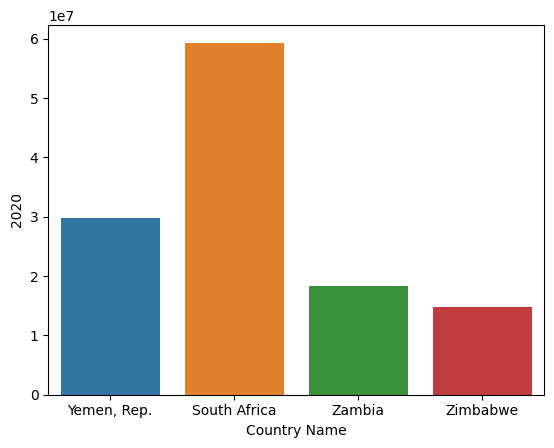

In [85]:
import seaborn as sns
sns.barplot(x='Country Name', y='2020', data=df.tail(4))

In [86]:
bd=df.loc[df['Country Name']=='World']
bd.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)
bd = bd.T
bd.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_5828\1209239543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)


,259
1960,3.032156e+09
1961,3.071596e+09
1962,3.124561e+09
1963,3.189656e+09
1964,3.255146e+09


In [87]:
bd.dropna(inplace=True)
bd=bd.reset_index().rename(columns={259:'population','index':'year'})
bd.tail()

,year,population
56,2016,7.433569e+09
57,2017,7.519183e+09
58,2018,7.602454e+09
59,2019,7.683372e+09
60,2020,7.761620e+09


<AxesSubplot: xlabel='year', ylabel='population'>

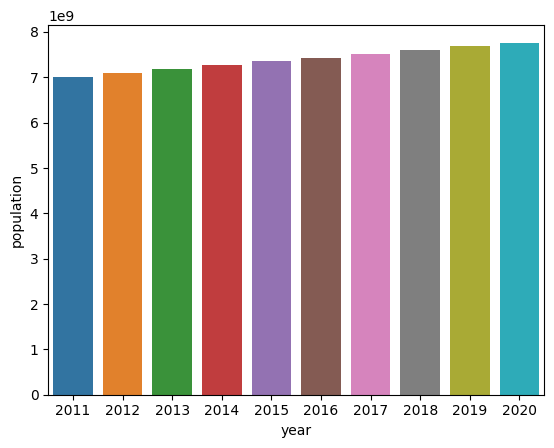

In [88]:
import seaborn as sns

sns.barplot(x='year', y='population', data=bd.tail(10))

In [121]:
from keras.models import Sequential
from keras.layers import Dense

bd['population'] = pd.to_numeric(bd['population'])
bd['year'] = pd.to_numeric(bd['year'])


x = bd['year']
y = bd['population']
y


0     3.032156e+09
1     3.071596e+09
2     3.124561e+09
3     3.189656e+09
4     3.255146e+09
          ...     
56    7.433569e+09
57    7.519183e+09
58    7.602454e+09
59    7.683372e+09
60    7.761620e+09
Name: population, Length: 61, dtype: float64

In [104]:
from sklearn.linear_model import LinearRegression
x = bd.iloc[:, 0].values
y = bd.iloc[:, 1].values
# model = LinearRegression().fit(x, y)
# y_pred = model.predict([[2030]])
# y_pred
x

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

x = bd["year"].values
y = bd["population"].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Reshape the input data to be 2D [samples, features]
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

# Define the model
model = Sequential()
model.add(Dense(1, input_shape=(x_train.shape[1],)))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions on the test data
y_pred = model.predict(x_test)

Epoch 1/100
48/48 - 0s - loss: 31078769282437349376.0000 - 297ms/epoch - 6ms/step
Epoch 2/100
48/48 - 0s - loss: 31078760486344327168.0000 - 41ms/epoch - 864us/step
Epoch 3/100
48/48 - 0s - loss: 31078767083414093824.0000 - 56ms/epoch - 1ms/step
Epoch 4/100
48/48 - 0s - loss: 31078760486344327168.0000 - 61ms/epoch - 1ms/step
Epoch 5/100
48/48 - 0s - loss: 31078758287321071616.0000 - 54ms/epoch - 1ms/step
Epoch 6/100
48/48 - 0s - loss: 31078762685367582720.0000 - 99ms/epoch - 2ms/step
Epoch 7/100
48/48 - 0s - loss: 31078760486344327168.0000 - 125ms/epoch - 3ms/step
Epoch 8/100
48/48 - 0s - loss: 31078753889274560512.0000 - 79ms/epoch - 2ms/step
Epoch 9/100
48/48 - 0s - loss: 31078749491228049408.0000 - 75ms/epoch - 2ms/step
Epoch 10/100
48/48 - 0s - loss: 31078751690251304960.0000 - 72ms/epoch - 1ms/step
Epoch 11/100
48/48 - 0s - loss: 31078753889274560512.0000 - 51ms/epoch - 1ms/step
Epoch 12/100
48/48 - 0s - loss: 31078751690251304960.0000 - 81ms/epoch - 2ms/step
Epoch 13/100
48/48 - 

In [139]:
x = bd['year'].values
y = bd['population'].values

# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# reshape data for keras
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

# create linear regression neural network
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

# compile and fit model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=1000, batch_size=1)

# make predictions
x_test
y_pred = model.predict(x_test)

Epoch 1/1000
48/48 [==============================] - 0s 2ms/step - loss: 29579336688336896000.0000
Epoch 2/1000
48/48 [==============================] - 0s 2ms/step - loss: 29579336688336896000.0000
Epoch 3/1000
48/48 [==============================] - 0s 2ms/step - loss: 29579334489313640448.0000
Epoch 4/1000
48/48 [==============================] - 0s 1ms/step - loss: 29579332290290384896.0000
Epoch 5/1000
48/48 [==============================] - 0s 1ms/step - loss: 29579334489313640448.0000
Epoch 6/1000
48/48 [==============================] - 0s 1ms/step - loss: 29579332290290384896.0000
Epoch 7/1000
48/48 [==============================] - 0s 1ms/step - loss: 29579332290290384896.0000
Epoch 8/1000
48/48 [==============================] - 0s 1ms/step - loss: 29579325693220618240.0000
Epoch 9/1000
48/48 [==============================] - 0s 1ms/step - loss: 29579327892243873792.0000
Epoch 10/1000
48/48 [==============================] - 0s 1ms/step - loss: 29579323494197362688.0000

In [140]:
y_pred

array([[95613.36 ],
       [95708.5  ],
       [93758.16 ],
       [95898.78 ],
       [94661.97 ],
       [95851.21 ],
       [95042.53 ],
       [93853.29 ],
       [93567.875],
       [95565.79 ],
       [94709.54 ],
       [94328.984],
       [94233.84 ]], dtype=float32)

In [141]:
y_pred = model.predict([[2019]])

y_pred

1/1 [==============================] - 0s 54ms/step


array([[96089.055]], dtype=float32)